In [124]:
import matplotlib.pyplot as plt
import keras
import numpy as np
import time

In [125]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.models import load_model

# Some Relevants Concepts about this distribuition

Train Mnist data have 6000 instances, that is, there are 6000 numbers between 0-9. 

For instance, in command line 6 I will print the first 10 labels about the training [5 0 4 1 9 2 1 3 1 4]. You can do other tests, if you want.


In [126]:
# This part is responsable for setup train and tests using mnist dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training Label Shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)


print("These is the first 10 training labels: ", y_train[:10]) 

Training Label Shape:  (60000,)
These is the first 10 training labels:  [5 0 4 1 9 2 1 3 1 4]


In [127]:
# Convert to "one-hot" vectors using the to_categorical function, that is, y_train*10

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# splitting dataset for faster learning and debugging
X_train, _,_,_,_,_ = np.split(X_train,6) 
y_train, _,_,_,_,_ = np.split(y_train,6)

# input and output shape
input_shape = X_train[1].shape

# Flatten the images
image_vector_size = 28*28
print(image_vector_size)

X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

print(y_train.shape)
print(X_train.shape)

784
(10000, 10)
(10000, 784)



#**DNA(DOUGLAS NEURAL ARCHITECTURE) PARAMETER TO OPTIMIZE** 

## **Depth** = [1,2,3,4,5,6,7,8,9,10]

---

## **Neurons_per_layer** = [16,32,64,128,256,512,1024]

---



## **Activations** = ["tanh","softmax","relu","sigmoid"] 

---



## **Optimizer** = ["sgd","rmsprop","adagrad","adadelta","adam","adamax","nadam"],


---

## **Losses** =["mean_squared_error","mean_absolute_error","mean_absolute_percentage_error","mean_squared_logarithmic_error","squared_hinge","hinge","categorical_hinge","logcosh","categorical_crossentropy","sparse_categorical_crossentropy","binary_crossentropy","kullback_leibler_divergence","poisson","cosine_proximity"]


---



In [128]:
# DNA[0] = depth
# DNA[1] = neurons_per_layer
# DNA[2] = activations
# DNA[3] = optimizer
# DNA[4] = losses
DNA_parameter = [[5,6,7,8,9,10],
                 [16,32,64,128,256,512,1024],
                 ["tanh","softmax","relu","sigmoid","elu","selu","softplus","softsign","hard_sigmoid","linear"], 
                 ["sgd","rmsprop","adagrad","adadelta","adam","adamax","nadam"],
                 ["mean_squared_error","mean_absolute_error","mean_absolute_percentage_error","mean_squared_logarithmic_error","squared_hinge","hinge","categorical_hinge","logcosh","categorical_crossentropy","binary_crossentropy","kullback_leibler_divergence","poisson","cosine_proximity"] 
                ]

# DOUGLAS NEURAL ARCHITECTURE STRUCTURE:
         architecture_DNA[0] = Depth
         architecture_DNA[1] = Input_layer with: [0] = neurons, [1] = activation
         architecture_DNA[2 to Depth-1*] = Hidden layer with: [0] = neurons, [1] = activation   
         architecture_DNA[Depth] = Output layer activation
         architecture_DNA[-1] = Hyperparameter with: [0] = loss, [1] = optimizer
        [link text]

         *Depth-1 last hidden layer since last layer is output layer
        

### UNFOLD CHILDREN ARTIFICIAL NEURAL NETWORK:                   
         children_ANN[0] = Depth                                                          
         children_ANN[1] = Input_layer with: [0] = neurons, [1] = activation              
         children_ANN[2 to Depth-1*] = Hidden layer with: [0] = neurons, [1] = activation 
         children_ANN[Depth] = Output layer activation                                    
         children_ANN[-1] = Hyperparameter with: [0] = loss, [1] = optimizer              
        

In [129]:
class Neural_Network:

    def __init__(self, input_shape, classes, DNA_param, epochs):
        
        self.architecture_DNA = [] # to save current parameters
        self.fitness = []
        self.acc_history = []
        self.input_shape = input_shape 
        self.classes = classes
        self.epochs = epochs

        
        # unfold DNA_parameters:
        depth = DNA_param[0]
        neurons_per_layer = DNA_param[1]
        activations = DNA_param[2]
        optimizer = DNA_param[3]
        losses = DNA_param[4]
        
        model = Sequential()

        # Building the init network with random choices: 
        network_depth = np.random.choice(depth)
        self.architecture_DNA.append(network_depth)

        for i in range(network_depth):
            if i == 0:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons, activation])

                model.add(Dense(neurons,input_shape = (self.input_shape,), activation  = activation))
            if i == network_depth - 1:
                activation  = np.random.choice(activations)
                self.architecture_DNA.append(activation)

                model.add(Dense(self.classes, activation = activation ))
            else:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons,activation])

                model.add(Dense(neurons, activation  = activation))
        
        loss=np.random.choice(losses)
        optimizer=np.random.choice(optimizer)
        self.architecture_DNA.append([loss,optimizer])

        model.compile(loss=loss, optimizer= optimizer, metrics=['accuracy'])
        self.model = model
        
      
    def create_children(self, children_DNA):
        model = Sequential()
        print()
        print("DNA Length: ", len(children_DNA))
        children_depth = children_DNA[0]
        print("DNA Depth: ", children_depth)
        print()
        print("New Values of Parameters :")
        print(children_DNA)

        for i in range(children_depth):
            if i == 0:
                #Input Layer

                model.add(Dense(children_DNA[1][0],input_shape = (self.input_shape,), activation = children_DNA[1][1]))
            if i == children_depth -1:

                model.add(Dense(self.classes, activation = children_DNA[children_depth]))
            else:
                #print(children_DNA[i+1])
                if i != children_depth -1:
                    model.add(Dense(children_DNA[i+1][0], activation = children_DNA[i+1][1]))

        model.compile(loss = children_DNA[-1][0], optimizer = children_DNA[-1][1], metrics=['accuracy'])
        self.model = model
        self.architecture_DNA = children_DNA
        
        
    def give_fitness(self):
        return self.fitness
    
        
    def train(self):
        
        self.model.fit(X_train,y_train, batch_size = 1, epochs = self.epochs, verbose = 1,shuffle = True) #, validation_data =(X_test, y_test)
        
 
    def test(self):
        loss, acc = self.model.evaluate(X_test,y_test)
        self.fitness = acc
        self.acc_history.append(acc)
    
    def give_DNA(self):
        return self.architecture_DNA
    
    def architecture(self):
        self.model.summary()

In [130]:
class GeneticAlgorithm:

    def __init__(self, population_size, mutation_rate, generations, Epochs):

        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.training_epochs = Epochs
        self.population = None
        self.children_population_DNA = []
        self.acces = []
        self.norm_acces = []
        
    def create_population(self):
        self.population = [Neural_Network(image_vector_size, num_classes, DNA_parameter,self.training_epochs) for i in range(self.population_size)]
    
    def train_generation(self):
        for member in self.population:
                member.train()
                
    def predict(self):
        for member in self.population:
                member.test()
                self.acc.append(member.give_fitness())
    
    def normalize(self):
        sum_ = sum(self.acc)
        self.norm_acc = [i/sum_ for i in self.acc] 
        #print("\nNormalization sum: ",sum(self.norm_acc))
        #assert sum(self.norm_acc) == 1
        
    def clear_losses(self):
        self.norm_acc = []
        self.acc = []
        
    def mutate(self):
        for child_DNA in self.children_population_DNA:

            for i in range(len(child_DNA)):
              
                if np.random.random() < self.mutation_rate:
                    print("\nMutation will hapeness now!")
                    time.sleep(10)
                    if i == 0:
                        new_depth = np.random.choice(DNA_parameter[0])
                        child_DNA[0] = new_depth
                    
                    if i == len(child_DNA)-2:
                        new_output_activation = np.random.choice(DNA_parameter[2])
                        child_DNA[-2] = new_output_activation
                    
                    if i == len(child_DNA)-1:
                        # random flip if loss or activation shall be changed

                        if np.random.random() < 0.5:
                            new_loss = np.random.choice(DNA_parameter[4])

                            child_DNA[-1][0] = new_loss
                        else:
                            new_optimizer = np.random.choice(DNA_parameter[3])
                            child_DNA[-1][1] = new_optimizer
                    if i != 0 and i !=len(child_DNA)-2 and i != len(child_DNA)-1:
                    
                        if np.random.random() < 0.33:
                            #print(child_DNA[i][1])
                            new_activation = np.random.choice(DNA_parameter[2])
                            #print(new_activation)
                            child_DNA[i][1] = new_activation

                        else:
                            #print(child_DNA[i][0])
                            new_neuron_count = np.random.choice(DNA_parameter[1])
                            child_DNA[i][0] = new_neuron_count
                            #print(new_neuron_count)

                    print("After mutation ", child_DNA)

    def reproduction(self):

        """ 
        Reproduction through midpoint crossover method 
        """

        population_idx = [i for i in range(len(self.population))]
        for i in range(len(self.population)):
        #selects two parents probabilistic accroding to the fitness score

            if sum(self.norm_acc) != 0:
                parent1 = np.random.choice(population_idx, p = self.norm_acc)
                parent2 = np.random.choice(population_idx, p = self.norm_acc)

            else:
              # if there are no "best" parents choose randomly 
                parent1 = np.random.choice(population_idx)
                parent2 = np.random.choice(population_idx)

            # picking random midpoint for crossing over name/DNA
            parent1_DNA = self.population[parent1].give_DNA()
            parent2_DNA = self.population[parent2].give_DNA()
            #print(parent1_DNA)
            
            mid_point_1 = np.random.choice([i for i in range(2,len(parent1_DNA)-2)])
            mid_point_2 = np.random.choice([i for i in range(2,len(parent2_DNA)-2)])
            # adding DNA-Sequences of the parents to final DNA
            child_DNA = parent1_DNA[:mid_point_1] + parent2_DNA[mid_point_2:]
            new_nn_depth = len(child_DNA)-2 # minus 2 because of depth parameter[0] and loss parameter[-1]
            child_DNA[0] = new_nn_depth
            self.children_population_DNA.append(child_DNA)

        # old population gets the new and proper weights
        self.mutate()

        keras.backend.clear_session() ## delete old models to free memory

        for i in range(len(self.population)):
            self.population[i].create_children(self.children_population_DNA[i])
        
        
    
    def run_evolution(self):
        for episode in range(self.generations):

            print("\n--- Generation {} ---".format(episode))

            self.clear_losses()
            self.train_generation()
            self.predict()

            if episode != self.generations -1:
                self.normalize()
                self.reproduction()
                
            else:
                pass
            self.children_population_DNA = []

        # plotting all the history:

        for a in range(self.generations):
            for member in self.population:

                plt.plot(member.acc_history)
        plt.xlabel("Number of Generations")
        plt.ylabel("Accuracy Rate")
        plt.show()


--- Generation 0 ---
313/313 [==============================] - 1s 2ms/step - loss: 0.2113 - accuracy: 0.5140

Mutation will hapeness now!
After mutation  [3, [512, 'softsign'], [32, 'softsign'], 'softmax', ['mean_absolute_error', 'adadelta']]

DNA Length:  9
DNA Depth:  7

New Values of Parameters :
[7, [16, 'hard_sigmoid'], [128, 'softmax'], [64, 'linear'], [16, 'hard_sigmoid'], [32, 'softsign'], [32, 'softsign'], 'linear', ['logcosh', 'adadelta']]

DNA Length:  12
DNA Depth:  10

New Values of Parameters :
[10, [512, 'softsign'], [128, 'sigmoid'], [64, 'sigmoid'], [16, 'elu'], [1024, 'sigmoid'], [128, 'linear'], [256, 'sigmoid'], [64, 'sigmoid'], [128, 'tanh'], 'softplus', ['binary_crossentropy', 'adamax']]

DNA Length:  7
DNA Depth:  5

New Values of Parameters :
[5, [16, 'hard_sigmoid'], [64, 'tanh'], [1024, 'sigmoid'], [128, 'tanh'], 'softplus', ['binary_crossentropy', 'adamax']]

DNA Length:  5
DNA Depth:  3

New Values of Parameters :
[3, [512, 'softsign'], [32, 'softsign'], '

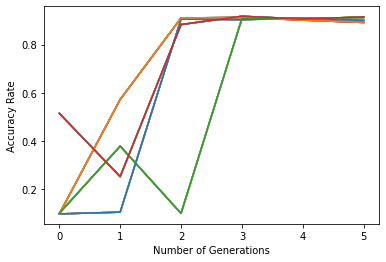

In [132]:
genetic_algorithm_test = GeneticAlgorithm(population_size = 4, mutation_rate = 0.02, generations = 6, Epochs=1)
genetic_algorithm_test.create_population()
genetic_algorithm_test.run_evolution()